In [46]:
# Imports
import sys

sys.path.insert(0, "../..")

from qiskit import QuantumCircuit, qasm2
from qiskit.quantum_info import Clifford, StabilizerState,state_fidelity
from qiskit.visualization import array_to_latex
from qiskit_aer import AerSimulator
import random
from visualisation import LiveVisualizer,GraphWatcher,MatrixWatcher
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford
from qiskit_aer import AerSimulator

from classical_shadow_n_clifford import ClassicalShadow_N_CLIFFORD
from shadow_protocol import ShadowProtocol

In [47]:
# Setup Experiment
class Id_Protocol(ShadowProtocol):

    def get_num_qubits(self) -> int:
        return 4
    
    def get_state_circuit(self) -> QuantumCircuit:
        circuit = QuantumCircuit(4)
        circuit.h(0)
        circuit.cx(0,1)
        circuit.h(2)
        circuit.cx(2,3)
        return circuit

    def run_circuit_and_get_measurement(self, circuit) -> list[int]:
        sim = AerSimulator()

        # Run with 997 shots
        job = sim.run(circuit, shots=997)
        result = job.result()

        counts = result.get_counts()
        max_hits= max(counts, key=counts.get)
        bit_list =  [int(bit) for bit in list(max_hits)]
        return bit_list[::-1] 
    
id_protocol = Id_Protocol()
# Create Classical Shadow Instance
shadow = ClassicalShadow_N_CLIFFORD(id_protocol)


In [48]:
circuit_025 = QuantumCircuit(4)
cliff_025 = Clifford(circuit_025)

In [49]:
circuit_05 = QuantumCircuit(4)
circuit_05.h(0)
circuit_05.cx(0,1)
cliff_05 = Clifford(circuit_05)

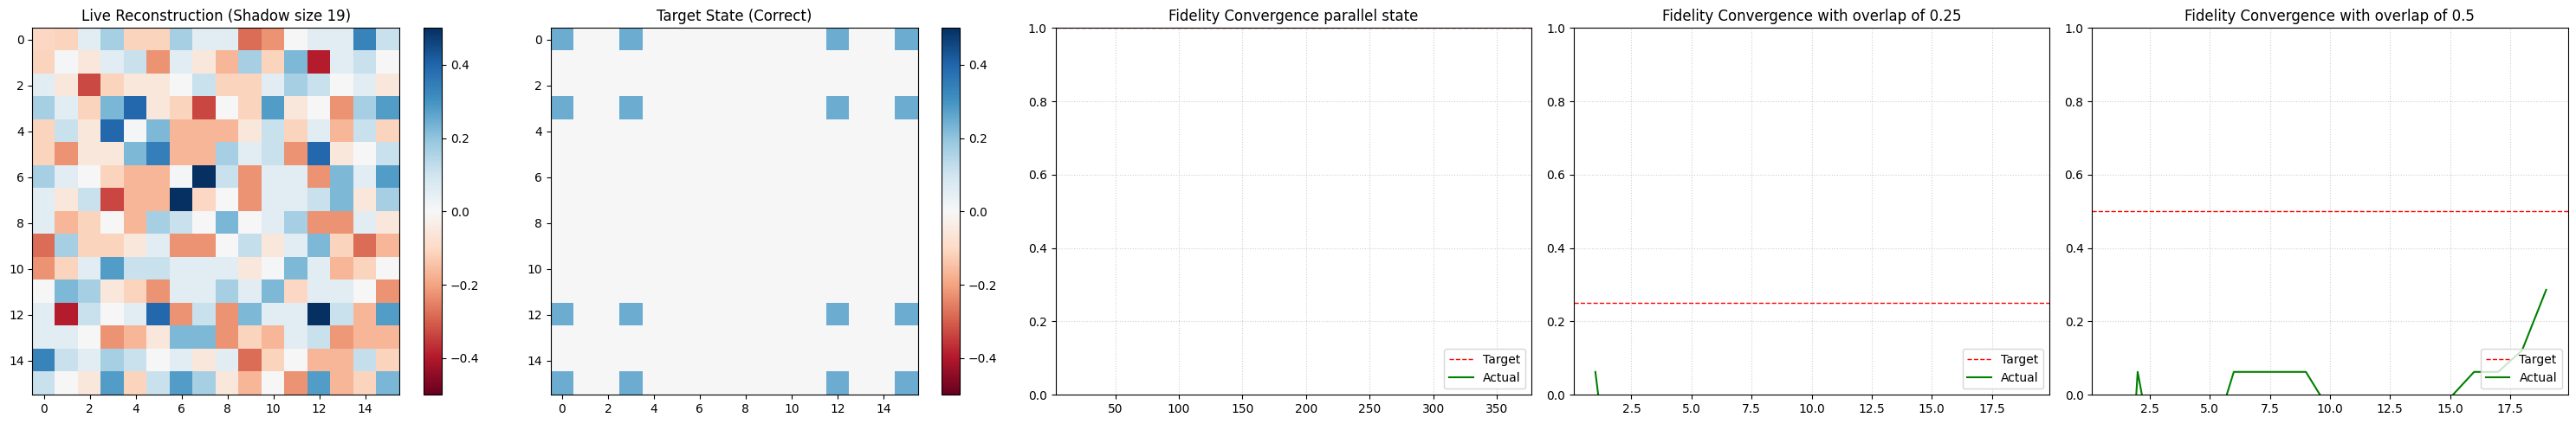

KeyboardInterrupt: 

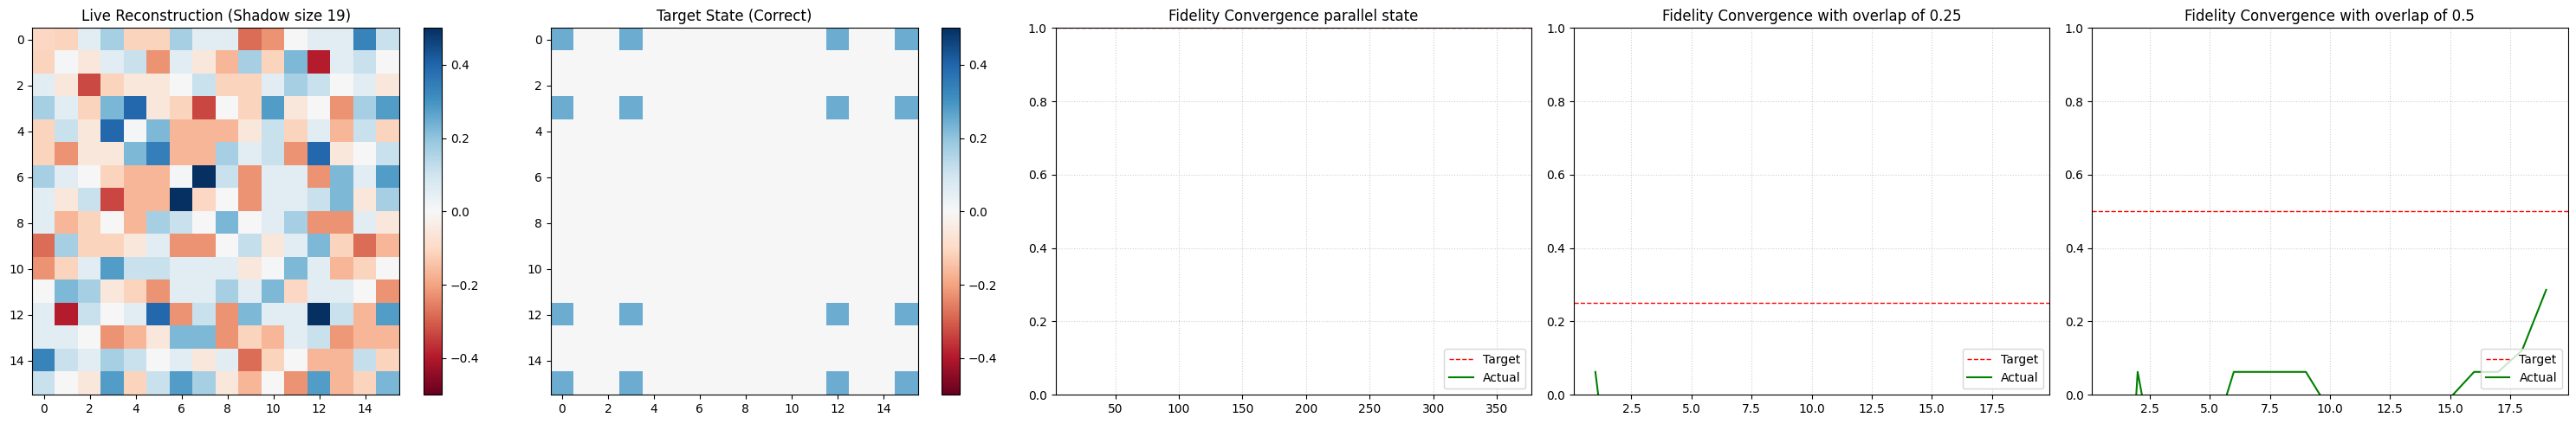

In [ ]:
vis = LiveVisualizer() # crates the object but nothing will be displayed for the moment

target_density_matrix = shadow.get_original_density_matrix()

fidelity_history_025 = []
fidelity_history_05 = []

while True:

    shadow.add_snapshot()
    
    shadow_size = shadow.get_shadow_size()


    if shadow_size%1 ==0:

        actual_density_matrix = shadow.get_density_matrix_from_cliffords()

        fidelity_history_025.append((shadow_size, shadow.calculate_fidelity(cliff_025)))

        fidelity_history_05.append((shadow_size, shadow.calculate_fidelity(cliff_05)))


        live_matrix_view = MatrixWatcher(
        title_template=f"Live Reconstruction (Shadow size {shadow_size})",
        matrix = actual_density_matrix
        )
        target_matrix_view = MatrixWatcher(
        title_template="Target State (Correct)",
        matrix = target_density_matrix
        )

        fidelity_graph_ortho = GraphWatcher(
        title="Fidelity Convergence with overlap of 0.25", 
        target_value=0.25, 
        history=fidelity_history_025,
        y_min=0.0, 
        y_max=1.0
        )

        fidelity_graph_scalar = GraphWatcher(
        title="Fidelity Convergence with overlap of 0.5", 
        target_value=0.5, 
        history=fidelity_history_05,
        y_min=0.0, 
        y_max=1.0
        )


        vis.update(
            live_matrix_view,    
            target_matrix_view,
            fidelity_graph_ortho,
            fidelity_graph_scalar
        )